# Stat 159 Final Project: Diabetes 
### By Bruce, Sam, Duy-Anh, Donghoon

In [1]:
#import statements
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import tree

In [2]:
#read data set csv
diabetes_binary_dataset =  pd.read_csv("../data/diabetes_binary_health_indicators_BRFSS2015.csv")

### Please see our EDA.ipynb file to get a better understanding of the datasets before continuing into the analysis/modeling section below.

### OLS Regression  

In [3]:
#7 numeric features dataframe
diabetes_binary_dataset[['BMI' , 'Income' , 'Education' , 'Age' , 'GenHlth' , 'MentHlth' , 'PhysHlth']]

,BMI,Income,Education,Age,GenHlth,MentHlth,PhysHlth
0,40.0,3.0,4.0,9.0,5.0,18.0,15.0
1,25.0,1.0,6.0,7.0,3.0,0.0,0.0
2,28.0,8.0,4.0,9.0,5.0,30.0,30.0
3,27.0,6.0,3.0,11.0,2.0,0.0,0.0
4,24.0,4.0,5.0,11.0,2.0,3.0,0.0
...,...,...,...,...,...,...,...
253675,45.0,7.0,6.0,5.0,3.0,0.0,5.0
253676,18.0,4.0,2.0,11.0,4.0,0.0,0.0
253677,28.0,2.0,5.0,2.0,1.0,0.0,0.0
253678,23.0,1.0,5.0,7.0,3.0,0.0,0.0


We did OLS regression on the first columns using the 7 numeric features (BMI, Income, Education, Age, General Health, Mental Health, Physical Health) to determine which features would be a valid in modeling the factors that affect diabetes. 

In [4]:
model1 = sm.ols('Diabetes_binary ~  BMI + Income + Education + Age + GenHlth + MentHlth + PhysHlth', data = diabetes_binary_dataset)
results = model1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Diabetes_binary   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     5554.
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        19:34:46   Log-Likelihood:                -72849.
No. Observations:              253680   AIC:                         1.457e+05
Df Residuals:                  253672   BIC:                         1.458e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3384      0.006    -61.496      0.0

Given that dependent variable Diabetes_binary is binary (0 = no diabetes, 1 = diabetes), positive coefficients indicate higher likeliness to have diabetes while negative coefficient has lower likeliness to develop diabetes.

The f-statistic is 5554 and greater than 10, indicating that it's a strong model and has significant explanatory power. Thed F-value is greater than the critical value, we can reject the null hypothesis. The omnibus is 68880 which also indicates that there's a significant overall relationship between the predictors and variable of interest.  

The r-squared is 0.133 which indicates that the model is better at fitting the data than a horizontal line. 

The p-values of the intercept is 0 which indicate that the data is statistically significant at the 1% level (and 5% level). This means that we reject the null hypothesis for a significance test at 1% and we can be 99% confident that the independent variables has a significant effect on Diabetes_binary. 

The positive coefficients of BMI, age, general health indicate that as these numbers increase, the chances of getting diabetes also increases. This reasonable since older, more overweight (higher BMI), and people who rate their health poorly will have worse health than those who are fit and younger. 

The negative coefficients of income and education indicate that with higher income and better/more years of education, there's less likelihood that one will develop diabetes. More income likely allows easier access to better food and better medical help. 

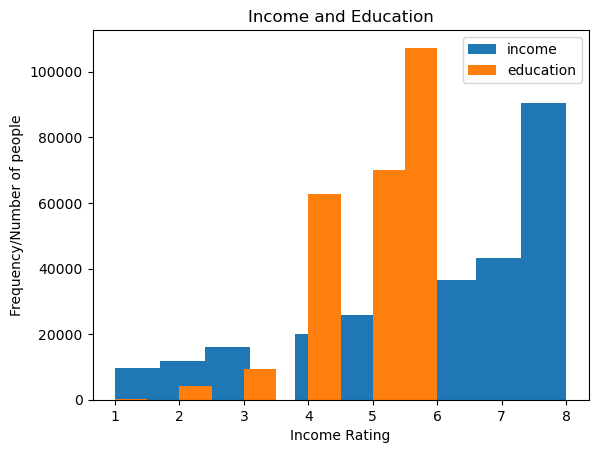

In [5]:
plt.hist(x = diabetes_binary_dataset['Income'], label = "income")
plt.hist(x = diabetes_binary_dataset['Education'], label = "education")
plt.title('Income and Education')
plt.ylabel('Frequency/Number of people')
plt.xlabel('Income Rating')
plt.legend()
plt.show()

Looking at this histogram, the income are generally distributed towards the higher end which indicates that the dataset is sampling from a higher income class. Higher income generally leads to access to higher education with more resources to afford tutors, private schools, etc. These two variables may be correlated with each other.


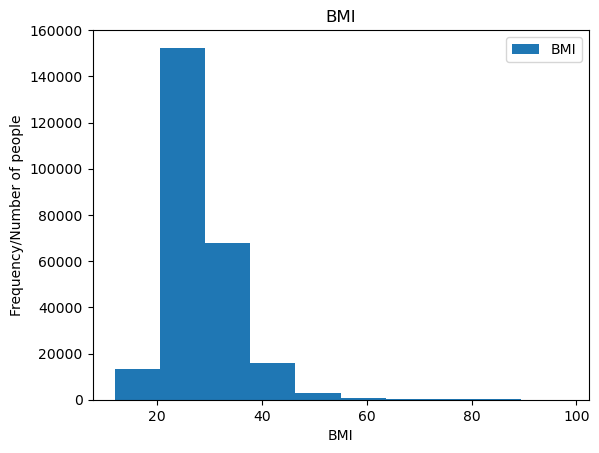

In [20]:
plt.hist(x = diabetes_binary_dataset['BMI'], label = "BMI")
plt.title('BMI')
plt.ylabel('Frequency/Number of people')
plt.xlabel('BMI')
plt.legend()
plt.show()

In [21]:
diabetes_binary_dataset['BMI'].describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

BMI is generally classified into five categories: <br/> <br/>
Under 18.5 – This is described as underweight. <br/>
Between 18.5 and 24.9 – This is described as the ‘healthy range’.<br/>
Between 25 and 29.9 – This is described as overweight<br/>
Between 30 and 39.9 – This is described as obesity<br/>
40 or over – This is described as severe obesity<br/>

Looking at the BMI column, the data is centered around 27 and most people are on average around 28 on the BMI scale. 50% of the data is between 24 and 31 BMI, indicating that people in this range are classified as mostly overweight with a few in 'healthy' and 'obsese' range.

## Model Comparison

We want to compare the classification accuracy of different models. In terms of classification accuracy, we want to predict the label of whether a people have diabetes. In the original dataframe, the data in the first column work as labels, while the rest of the data would be training features. To train different models, we will split the original data randomly into training data and testing data with a ratio of 80/20. This is the standard approach that works efficiently in the industry.

### 1. Random Forest Classification

In [7]:
# Training preparation and train-test split
X = diabetes_binary_dataset.drop(['Diabetes_binary'], axis = 1)
y = diabetes_binary_dataset['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=159)


In [8]:
# Model training and prediction
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
rf_model1 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', min_samples_split=10, random_state=159)
rf_model1.fit(X_train, y_train)
rf_model1_pred = rf_model1.predict(X_test)

In [9]:
# Model accuracy evaluation
rf_model1_accuracy = accuracy_score(y_test, rf_model1_pred)
rf_model1_rmse = mean_squared_error(y_test, rf_model1_pred)**0.5
print(f'accuracy: {rf_model1_accuracy}, rmse: {rf_model1_rmse}')

accuracy: 0.8656575212866604, rmse: 0.3665275961143167


### 2. Logistic Regression

In [10]:
# Training preparation and train-test split
X = diabetes_binary_dataset.drop(['Diabetes_binary'], axis = 1)
y = diabetes_binary_dataset['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=159)

In [11]:
# Model training and prediction
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
logis_model = LogisticRegression()
logis_model.fit(X_train, y_train)
logis_model_pred = logis_model.predict(X_test)


In [12]:
# Model accuracy evaluation
logis_model_accuracy = accuracy_score(y_test, logis_model_pred)
logis_model_rmse = mean_squared_error(y_test, logis_model_pred)**0.5
print(f'accuracy: {logis_model_accuracy}, rmse: {logis_model_rmse}')

accuracy: 0.8628981393882056, rmse: 0.37027268412859515


### 3. Decision Tree

In [13]:
# Training preparation and train-test split
X = diabetes_binary_dataset.drop(['Diabetes_binary'], axis = 1)
y = diabetes_binary_dataset['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=159)

In [14]:
# Model training and prediction
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
dt_model = DecisionTreeClassifier(max_depth = 3)
dt_model.fit(X_train, y_train)
dt_model_pred = dt_model.predict(X_test)

In [15]:
# Model accuracy evaluation
dt_model_accuracy = accuracy_score(y_test, dt_model_pred)
dt_model_rmse = mean_squared_error(y_test, dt_model_pred)**0.5
print(f'accuracy: {dt_model_accuracy}, rmse: {dt_model_rmse}')

accuracy: 0.8599810785241249, rmse: 0.3741910227088233


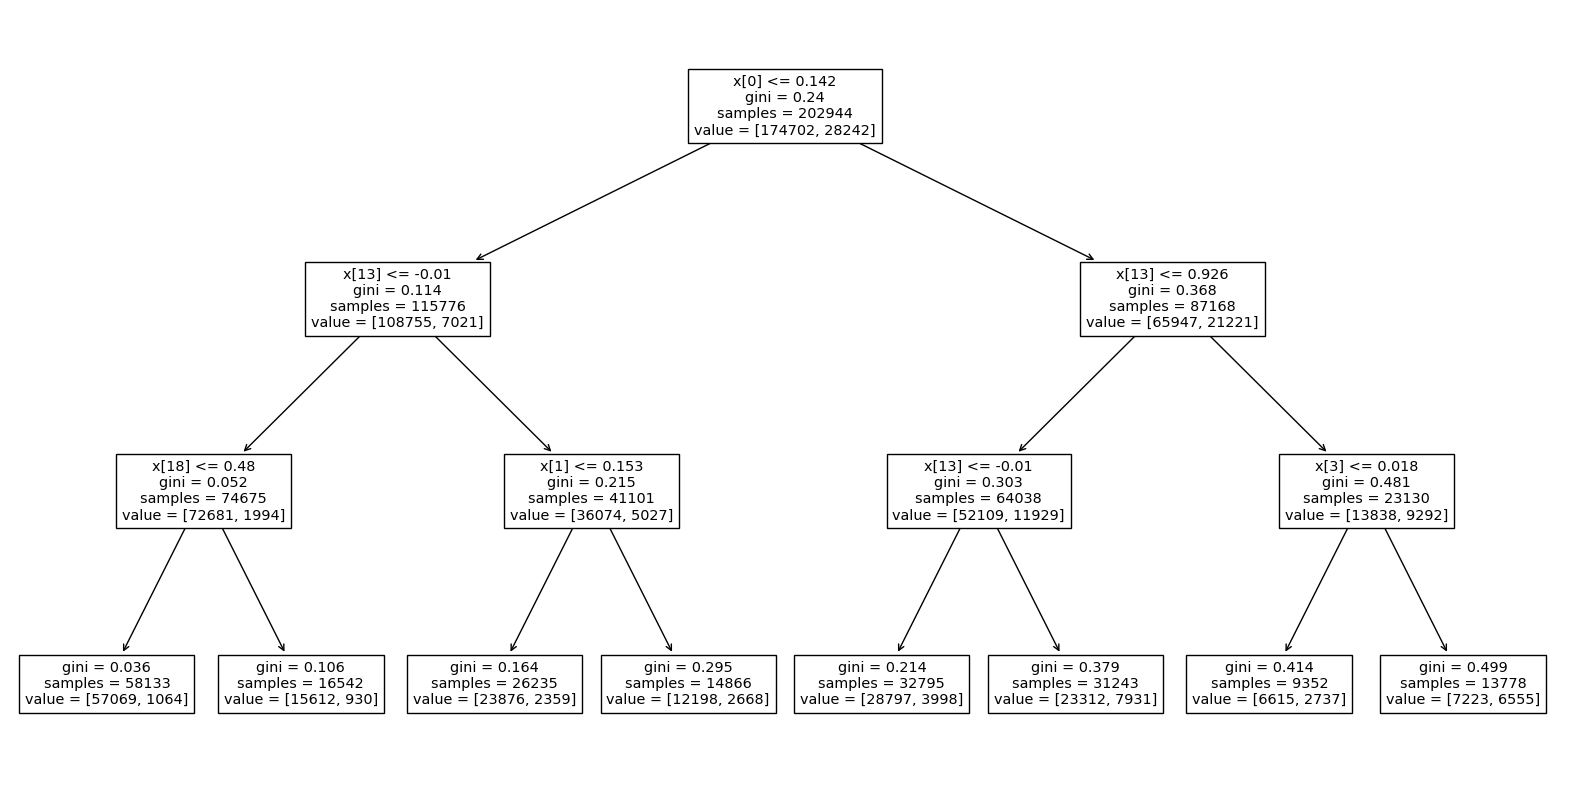

In [16]:
# plotting decision tree classifier
plt.figure(figsize = (20,10))
tree.plot_tree(dt_model)
plt.show()

### 4. K Nearest Neighbor (KNN)

In [17]:
# Training preparation and train-test split
X = diabetes_binary_dataset.drop(['Diabetes_binary'], axis = 1)
y = diabetes_binary_dataset['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=159)

In [18]:
# Model training and prediction
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)
knn_model_pred = knn_model.predict(X_test)

In [19]:
# Model accuracy evaluation
knn_model_accuracy = accuracy_score(y_test, knn_model_pred)
knn_model_rmse = mean_squared_error(y_test, knn_model_pred)**0.5
print(f'accuracy: {knn_model_accuracy}, rmse: {knn_model_rmse}')

accuracy: 0.8366051718700726, rmse: 0.4042212613531449
